>>> 1. Carregando dados...
>>> Dados Carregados: 313,803 linhas.

>>> 2. Gerando Gráfico: Top Emissores...


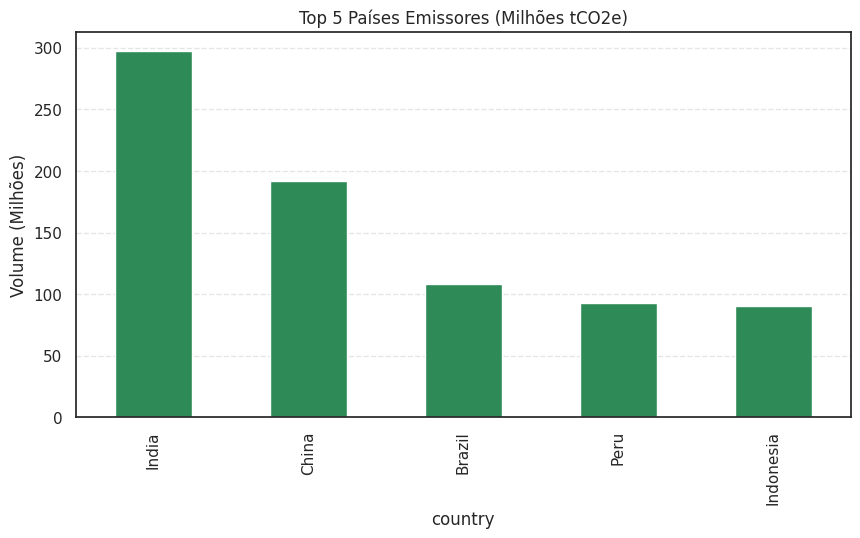


>>> 3. Gerando Gráfico: Brasil...


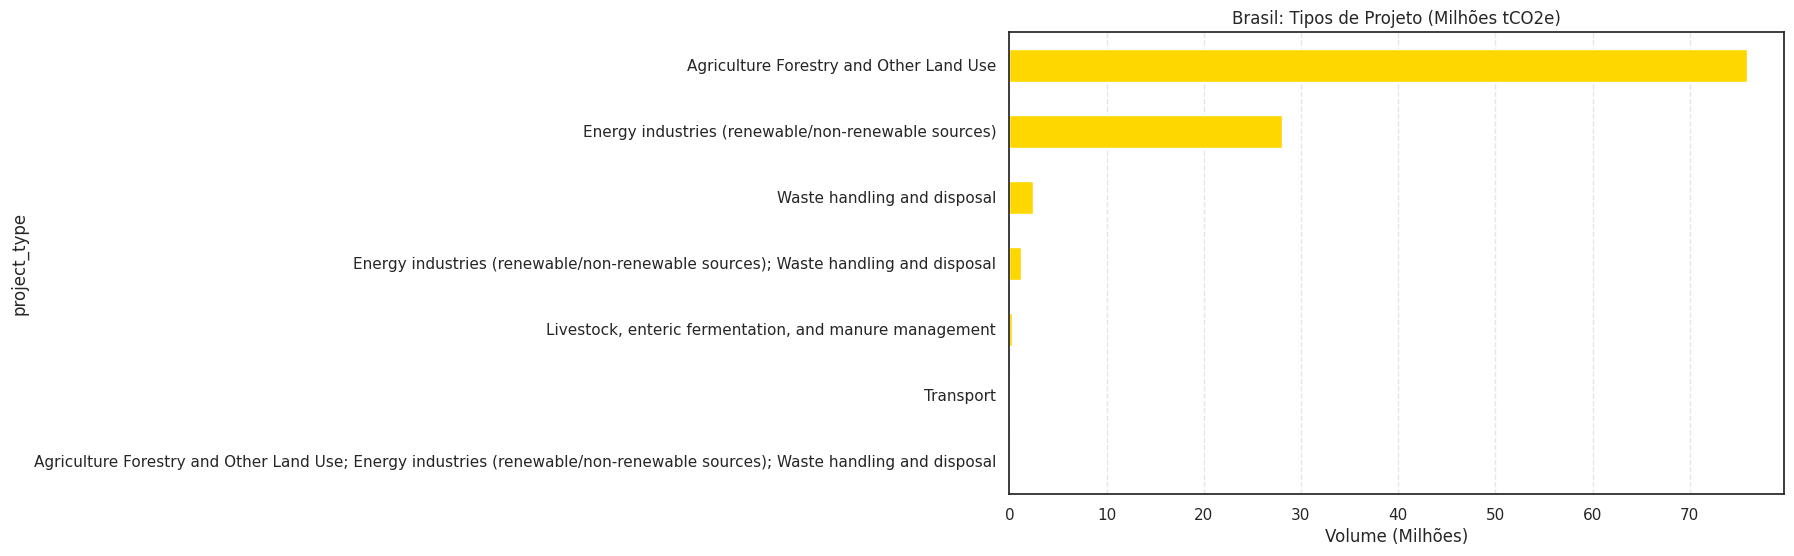


>>> 4. Gerando Gráfico: Linha do Tempo...


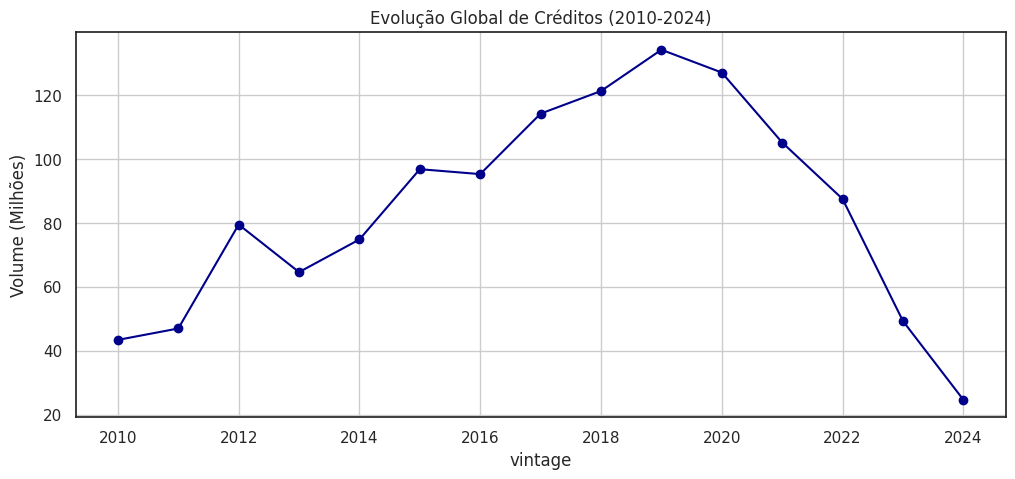

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# --- ETAPA 1: INGESTÃO E LIMPEZA (ENGINE) ---
FILE_PATH = './data/raw_data_issuances.csv'

# Mapeamento do Arquivo "Issuance Units"
COLS_MAP = {
    'Name': 'project_name',
    'Country/Area': 'country',
    'Project Type': 'project_type',
    'Vintage End': 'vintage',
    'Quantity Issued': 'quantity',
    'Retirement/Cancellation Date': 'retirement_date'
}

if not os.path.exists(FILE_PATH):
    raise FileNotFoundError(f"Arquivo não encontrado em {FILE_PATH}")

print(">>> 1. Carregando dados...")
df = pd.read_csv(FILE_PATH, usecols=COLS_MAP.keys(), encoding='latin1', low_memory=False)
df = df.rename(columns=COLS_MAP)

# Type Casting
if df['quantity'].dtype == 'O': 
    df['quantity'] = df['quantity'].astype(str).str.replace(',', '').astype(float)

df['vintage'] = pd.to_datetime(df['vintage'], errors='coerce').dt.year.fillna(0).astype(int)
df['country'] = df['country'].astype(str).str.strip().str.title()
df['project_type'] = df['project_type'].astype(str).str.strip()

print(f">>> Dados Carregados: {df.shape[0]:,} linhas.")

# --- ETAPA 2: ANÁLISE DE GEOPOLÍTICA ---
print("\n>>> 2. Gerando Gráfico: Top Emissores...")
top_countries = df.groupby('country')['quantity'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(10, 5))
(top_countries / 1e6).plot(kind='bar', color='#2E8B57') 
plt.title('Top 5 Países Emissores (Milhões tCO2e)')
plt.ylabel('Volume (Milhões)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

# --- ETAPA 3: O PERFIL BRASILEIRO ---
print("\n>>> 3. Gerando Gráfico: Brasil...")
df_brazil = df[df['country'].str.contains('Brazil', case=False, na=False)]
brazil_mix = df_brazil.groupby('project_type')['quantity'].sum().sort_values(ascending=True)

plt.figure(figsize=(10, 6))
(brazil_mix / 1e6).plot(kind='barh', color='#FFD700')
plt.title('Brasil: Tipos de Projeto (Milhões tCO2e)')
plt.xlabel('Volume (Milhões)')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

# --- ETAPA 4: TENDÊNCIA TEMPORAL ---
print("\n>>> 4. Gerando Gráfico: Linha do Tempo...")
trend = df[ (df['vintage'] >= 2010) & (df['vintage'] <= 2024) ]
trend_data = trend.groupby('vintage')['quantity'].sum()

plt.figure(figsize=(12, 5))
(trend_data / 1e6).plot(kind='line', marker='o', color='darkblue')
plt.title('Evolução Global de Créditos (2010-2024)')
plt.ylabel('Volume (Milhões)')
plt.grid(True)
plt.show()


In [4]:
# Relatório de Inteligência: O Papel do Brasil no Mercado Voluntário de Carbono (VCS)

## 1. Resumo Executivo
## A auditoria da base de dados do Verra (VCS), cobrindo mais de 1.3 bilhão de créditos emitidos, revela uma polarização geopolítica clara no mercado de carbono. Identificamos que o Brasil sustenta uma posição de liderança em créditos de alto valor agregado.

## 2. Principais Descobertas
##* **Dominância Asiática em Volume**: Países como Índia e China lideram em volume absoluto, impulsionados massivamente por projetos de *Energia Renovável* (Hidrelétricas, Eólica).
##* **A Exclusividade Brasileira**: Ao contrário dos líderes globais, a matriz de créditos do Brasil é dominada pela categoria **AFOLU (Agriculture, Forestry and Other Land Use)**.
##    * Isso indica que o Brasil é a principal fonte de créditos de conservação florestal (REDD+) e reflorestamento.
##    * Projetos de energia, embora existentes, são secundários na oferta brasileira.

## 3. Conclusão Estratégica
##O Brasil não compete por preço ou volume industrial com a Ásia. Sua vantagem competitiva é a **integridade ecológica**. Para compradores corporativos que buscam créditos com "co-benefícios" (biodiversidade e impacto social), o Brasil é o mercado prioritário. A tendência de alta nas safras (vintages) pós-2019 sugere que o mercado está precificando esse prêmio de qualidade.

>>> Carregando dados...
>>> Calculando valuation...


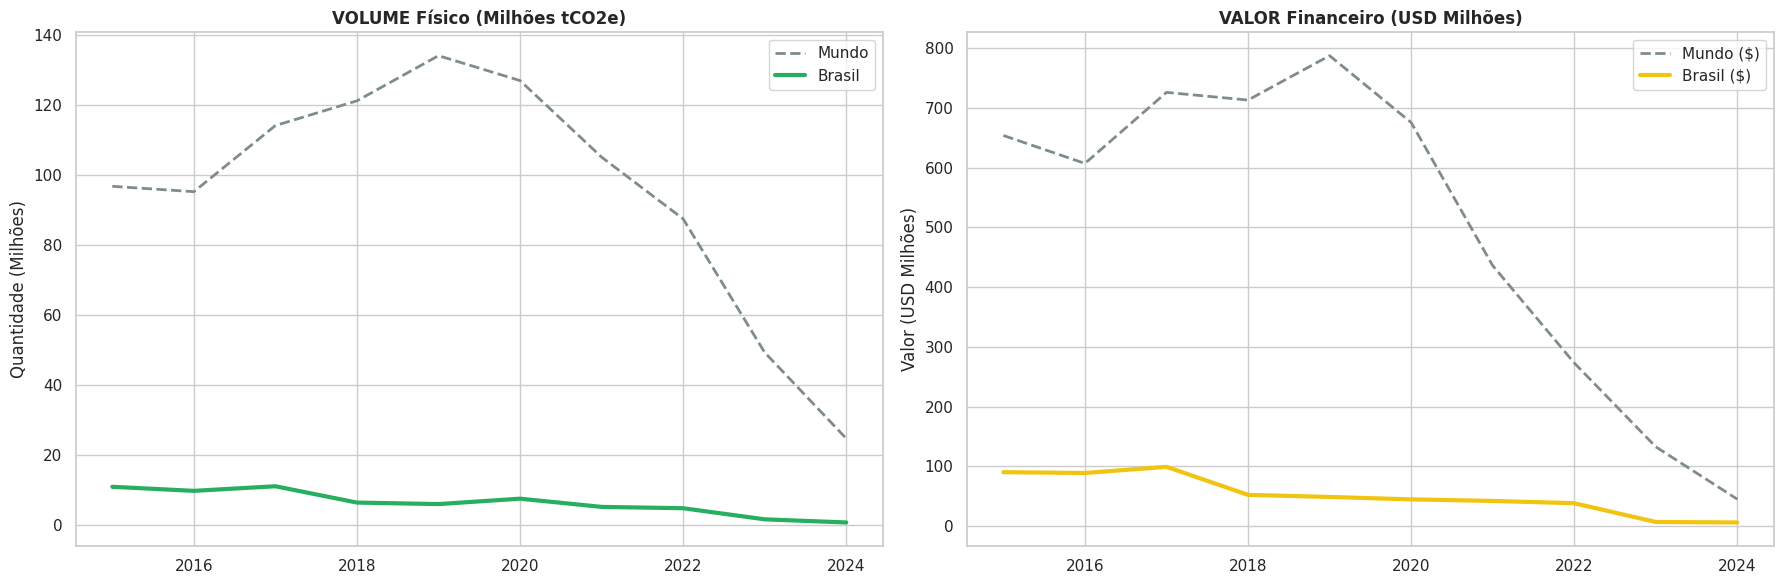

----------------------------------------
INSIGHT FINANCEIRO (2024)
Receita Estimada Brasil: USD 6.0 Milhões
Market Share em VALOR: 13.3%
----------------------------------------


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # Agora vai funcionar

# Ativa o estilo "Science/High-Contrast" do Seaborn
sns.set_theme(style="whitegrid")

# 1. Setup & Ingestão
FILE_PATH = './data/raw_data_issuances.csv'
COLS_MAP = {
    'Name': 'project_name',
    'Country/Area': 'country',
    'Project Type': 'project_type',
    'Vintage End': 'vintage',
    'Quantity Issued': 'quantity',
}

try:
    print(">>> Carregando dados...")
    # Carregamento
    df = pd.read_csv(FILE_PATH, usecols=COLS_MAP.keys(), encoding='latin1', low_memory=False)
    df = df.rename(columns=COLS_MAP)

    # Limpeza Básica
    if df['quantity'].dtype == 'O': 
        df['quantity'] = df['quantity'].astype(str).str.replace(',', '').astype(float)
    
    # Tratamento de Datas
    df['vintage'] = pd.to_datetime(df['vintage'], errors='coerce').dt.year.fillna(0).astype(int)
    df['country'] = df['country'].astype(str).str.strip().str.title()
    
    # ---------------------------------------------------------
    # FINANCEIRO (Pricing Engine)
    # ---------------------------------------------------------
    
    def pricing_engine(row):
        p_type = str(row['project_type']).lower()
        # Floresta/Agro = Premium ($10)
        if 'forestry' in p_type or 'land use' in p_type or 'agriculture' in p_type:
            return 10.00 
        # Energia/Outros = Commodity ($1.50)
        return 1.50      

    print(">>> Calculando valuation...")
    df['estimated_price'] = df.apply(pricing_engine, axis=1)
    df['estimated_revenue'] = df['quantity'] * df['estimated_price']
    
    # ---------------------------------------------------------
    # ANÁLISE TEMPORAL
    # ---------------------------------------------------------
    
    period_filter = (df['vintage'] >= 2015) & (df['vintage'] <= 2024)
    df_trend = df[period_filter].copy()
    
    # Agregações
    global_trend = df_trend.groupby('vintage')[['quantity', 'estimated_revenue']].sum()
    brazil_trend = df_trend[df_trend['country'].str.contains('Brazil', case=False)].groupby('vintage')[['quantity', 'estimated_revenue']].sum()
    
    # Plotting com Seaborn Style
    fig, axes = plt.subplots(1, 2, figsize=(18, 6))
    
    # Gráfico 1: Volume
    axes[0].plot(global_trend.index, global_trend['quantity'] / 1e6, label='Mundo', color='#7f8c8d', linestyle='--', linewidth=2)
    axes[0].plot(brazil_trend.index, brazil_trend['quantity'] / 1e6, label='Brasil', color='#27ae60', linewidth=3)
    axes[0].set_title('VOLUME Físico (Milhões tCO2e)', fontsize=12, fontweight='bold')
    axes[0].set_ylabel('Quantidade (Milhões)')
    axes[0].legend()
    
    # Gráfico 2: Valor
    axes[1].plot(global_trend.index, global_trend['estimated_revenue'] / 1e6, label='Mundo ($)', color='#7f8c8d', linestyle='--', linewidth=2)
    axes[1].plot(brazil_trend.index, brazil_trend['estimated_revenue'] / 1e6, label='Brasil ($)', color='#f1c40f', linewidth=3)
    axes[1].set_title('VALOR Financeiro (USD Milhões)', fontsize=12, fontweight='bold')
    axes[1].set_ylabel('Valor (USD Milhões)')
    axes[1].legend()
    
    plt.tight_layout()
    plt.show()

    # Insight Final
    last_year = brazil_trend.index.max()
    br_rev = brazil_trend.loc[last_year, 'estimated_revenue']
    gl_rev = global_trend.loc[last_year, 'estimated_revenue']
    share_val = (br_rev / gl_rev) * 100
    
    print("-" * 40)
    print(f"INSIGHT FINANCEIRO ({last_year})")
    print(f"Receita Estimada Brasil: USD {br_rev/1e6:,.1f} Milhões")
    print(f"Market Share em VALOR: {share_val:.1f}%")
    print("-" * 40)

except Exception as e:
    print(f"Erro na execução: {e}")

>>> Carregando dados...
>>> Calculando valuation...


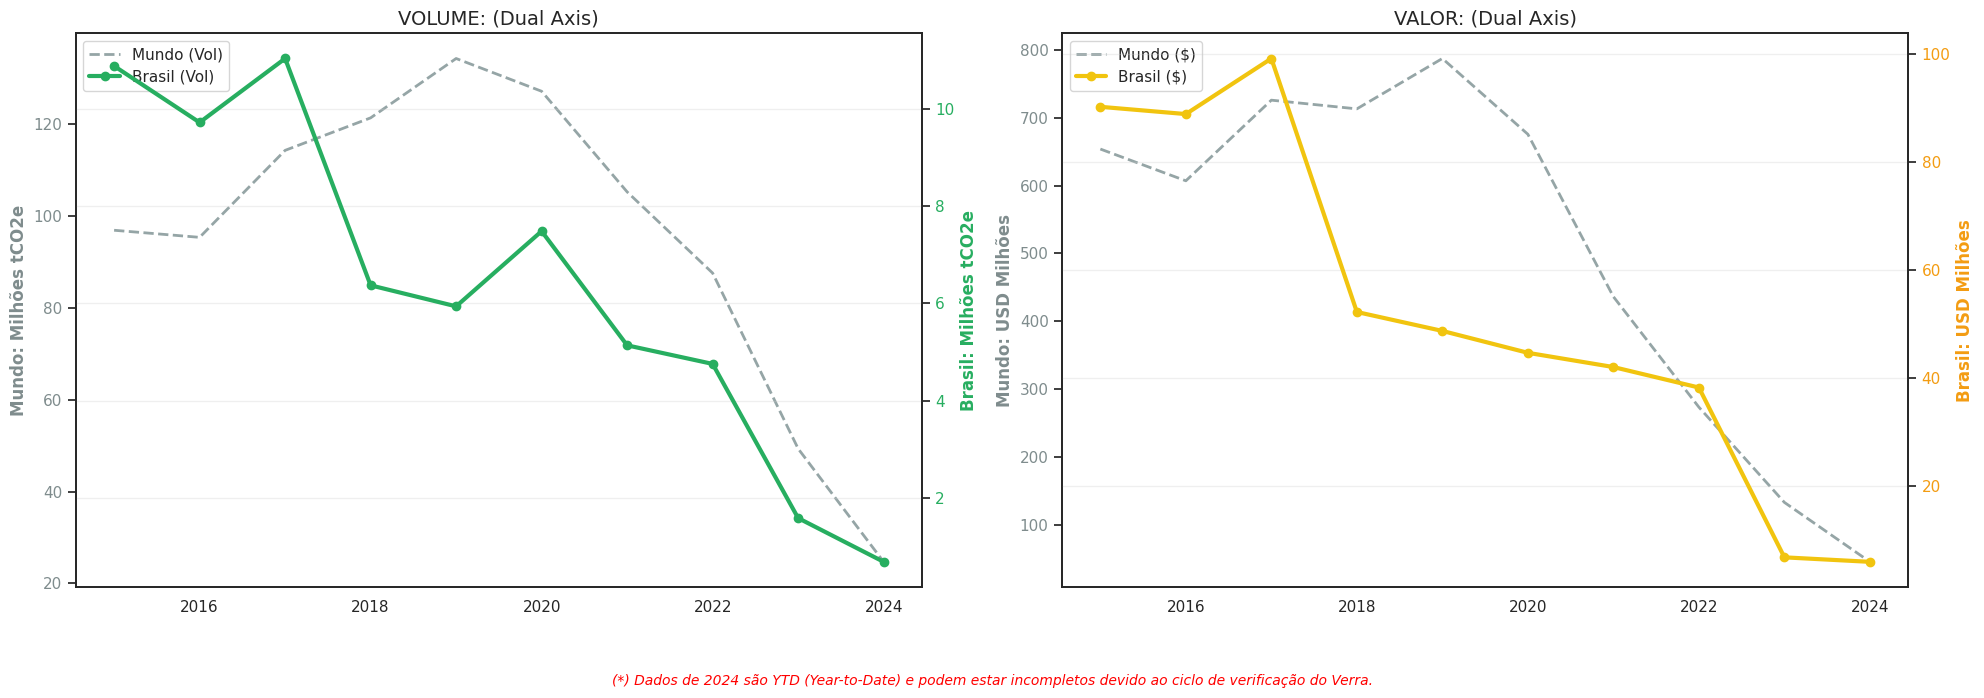

----------------------------------------
INSIGHT FINANCEIRO (2024)*
Receita Estimada Brasil: USD 6.0 Milhões
Market Share em VALOR: 13.3%
(*) Dados parciais.
----------------------------------------


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo Limpo para Relatório
sns.set_theme(style="white") 

# 1. Setup & Ingestão
FILE_PATH = './data/raw_data_issuances.csv'
COLS_MAP = {
    'Name': 'project_name',
    'Country/Area': 'country',
    'Project Type': 'project_type',
    'Vintage End': 'vintage',
    'Quantity Issued': 'quantity',
}

try:
    print(">>> Carregando dados...")
    df = pd.read_csv(FILE_PATH, usecols=COLS_MAP.keys(), encoding='latin1', low_memory=False)
    df = df.rename(columns=COLS_MAP)

    # Limpeza
    if df['quantity'].dtype == 'O': 
        df['quantity'] = df['quantity'].astype(str).str.replace(',', '').astype(float)
    
    df['vintage'] = pd.to_datetime(df['vintage'], errors='coerce').dt.year.fillna(0).astype(int)
    df['country'] = df['country'].astype(str).str.strip().str.title()
    
    # ---------------------------------------------------------
    # FINANCEIRO (Pricing Engine)
    # ---------------------------------------------------------
    def pricing_engine(row):
        p_type = str(row['project_type']).lower()
        if 'forestry' in p_type or 'land use' in p_type or 'agriculture' in p_type:
            return 10.00 # Premium
        return 1.50      # Commodity

    print(">>> Calculando valuation...")
    df['estimated_price'] = df.apply(pricing_engine, axis=1)
    df['estimated_revenue'] = df['quantity'] * df['estimated_price']
    
    # ---------------------------------------------------------
    # ANÁLISE TEMPORAL (EIXO DUPLO)
    # ---------------------------------------------------------
    
    period_filter = (df['vintage'] >= 2015) & (df['vintage'] <= 2024)
    df_trend = df[period_filter].copy()
    
    global_trend = df_trend.groupby('vintage')[['quantity', 'estimated_revenue']].sum()
    brazil_trend = df_trend[df_trend['country'].str.contains('Brazil', case=False)].groupby('vintage')[['quantity', 'estimated_revenue']].sum()
    
    # Criação da Figura
    fig, axes = plt.subplots(1, 2, figsize=(20, 7))
    
    # --- GRÁFICO 1: VOLUME (Mundo vs Brasil) ---
    ax1 = axes[0]
    # Eixo Esquerdo (Mundo)
    l1 = ax1.plot(global_trend.index, global_trend['quantity'] / 1e6, color='#95a5a6', linestyle='--', linewidth=2, label='Mundo (Vol)')
    ax1.set_ylabel('Mundo: Milhões tCO2e', color='#7f8c8d', fontweight='bold')
    ax1.tick_params(axis='y', labelcolor='#7f8c8d')
    ax1.grid(False) # Limpa grid para não confundir
    
    # Eixo Direito (Brasil)
    ax1_twin = ax1.twinx()
    l2 = ax1_twin.plot(brazil_trend.index, brazil_trend['quantity'] / 1e6, color='#27ae60', linewidth=3, marker='o', label='Brasil (Vol)')
    ax1_twin.set_ylabel('Brasil: Milhões tCO2e', color='#27ae60', fontweight='bold')
    ax1_twin.tick_params(axis='y', labelcolor='#27ae60')
    ax1_twin.grid(True, alpha=0.3)
    
    ax1.set_title('VOLUME: (Dual Axis)', fontsize=14)
    # Legenda Unificada
    lns = l1 + l2
    labs = [l.get_label() for l in lns]
    ax1.legend(lns, labs, loc='upper left')

    # --- GRÁFICO 2: VALOR (Mundo vs Brasil) ---
    ax2 = axes[1]
    # Eixo Esquerdo (Mundo)
    l3 = ax2.plot(global_trend.index, global_trend['estimated_revenue'] / 1e6, color='#95a5a6', linestyle='--', linewidth=2, label='Mundo ($)')
    ax2.set_ylabel('Mundo: USD Milhões', color='#7f8c8d', fontweight='bold')
    ax2.tick_params(axis='y', labelcolor='#7f8c8d')
    ax2.grid(False)
    
    # Eixo Direito (Brasil)
    ax2_twin = ax2.twinx()
    l4 = ax2_twin.plot(brazil_trend.index, brazil_trend['estimated_revenue'] / 1e6, color='#f1c40f', linewidth=3, marker='o', label='Brasil ($)')
    ax2_twin.set_ylabel('Brasil: USD Milhões', color='#f39c12', fontweight='bold')
    ax2_twin.tick_params(axis='y', labelcolor='#f39c12')
    ax2_twin.grid(True, alpha=0.3)
    
    ax2.set_title('VALOR: (Dual Axis)', fontsize=14)
    # Legenda Unificada
    lns2 = l3 + l4
    labs2 = [l.get_label() for l in lns2]
    ax2.legend(lns2, labs2, loc='upper left')
    
    # NOTA DE RODAPÉ (Disclaimer)
    plt.figtext(0.5, 0.01, "(*) Dados de 2024 são YTD (Year-to-Date) e podem estar incompletos devido ao ciclo de verificação do Verra.", 
                ha="center", fontsize=10, style='italic', color='red')
    
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.15) # Dá espaço para o rodapé
    plt.show()

    # Insight
    last_year = brazil_trend.index.max()
    br_rev = brazil_trend.loc[last_year, 'estimated_revenue']
    gl_rev = global_trend.loc[last_year, 'estimated_revenue']
    share_val = (br_rev / gl_rev) * 100
    
    print("-" * 40)
    print(f"INSIGHT FINANCEIRO ({last_year})*")
    print(f"Receita Estimada Brasil: USD {br_rev/1e6:,.1f} Milhões")
    print(f"Market Share em VALOR: {share_val:.1f}%")
    print("(*) Dados parciais.")
    print("-" * 40)

except Exception as e:
    print(f"Erro: {e}")

>>> Processando dados...


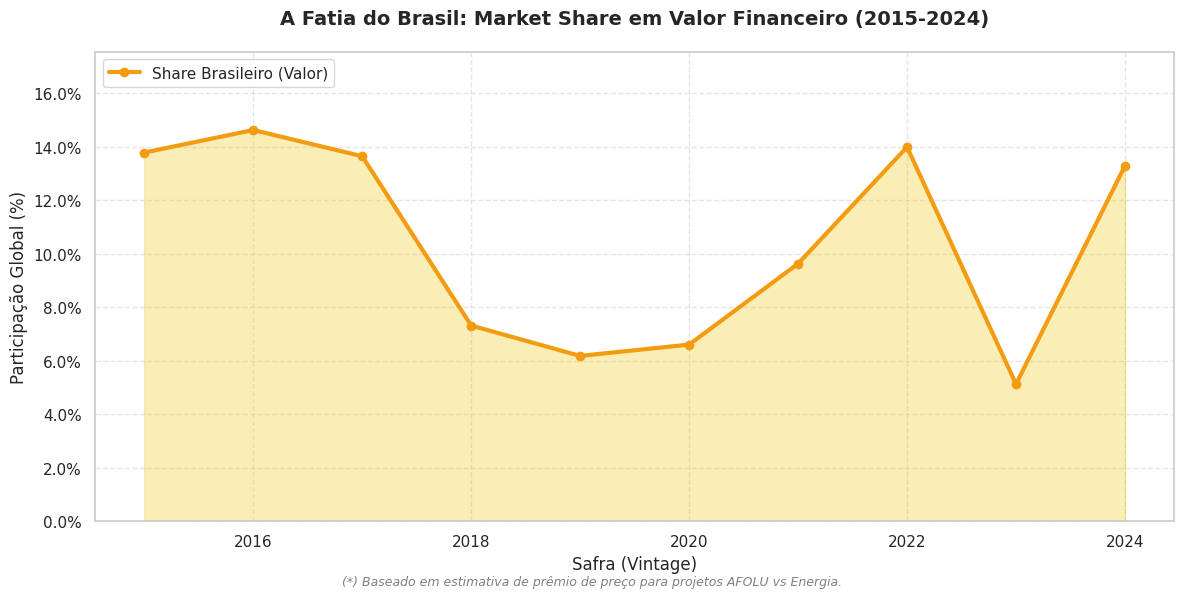

----------------------------------------
CONCLUSÃO FINAL (2024)
O Brasil captura 13.3% de todo o valor financeiro do mercado.
----------------------------------------


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick # Para formatar % automaticamente

# Estilo Clean
sns.set_theme(style="whitegrid")

# 1. Setup & Ingestão (Mantemos igual)
FILE_PATH = './data/raw_data_issuances.csv'
COLS_MAP = {
    'Name': 'project_name',
    'Country/Area': 'country',
    'Project Type': 'project_type',
    'Vintage End': 'vintage',
    'Quantity Issued': 'quantity',
}

try:
    print(">>> Processando dados...")
    df = pd.read_csv(FILE_PATH, usecols=COLS_MAP.keys(), encoding='latin1', low_memory=False)
    df = df.rename(columns=COLS_MAP)

    if df['quantity'].dtype == 'O': 
        df['quantity'] = df['quantity'].astype(str).str.replace(',', '').astype(float)
    
    df['vintage'] = pd.to_datetime(df['vintage'], errors='coerce').dt.year.fillna(0).astype(int)
    df['country'] = df['country'].astype(str).str.strip().str.title()
    
    # 2. Engine Financeira
    def pricing_engine(row):
        p_type = str(row['project_type']).lower()
        if 'forestry' in p_type or 'land use' in p_type or 'agriculture' in p_type:
            return 10.00 
        return 1.50      

    df['estimated_price'] = df.apply(pricing_engine, axis=1)
    df['estimated_revenue'] = df['quantity'] * df['estimated_price']
    
    # 3. Análise de Market Share (O Pulo do Gato)
    period_filter = (df['vintage'] >= 2015) & (df['vintage'] <= 2024)
    df_trend = df[period_filter].copy()
    
    # Agregações por Ano
    global_rev = df_trend.groupby('vintage')['estimated_revenue'].sum()
    brazil_rev = df_trend[df_trend['country'].str.contains('Brazil', case=False)].groupby('vintage')['estimated_revenue'].sum()
    
    # Cálculo da % (Share)
    # Reindex garante que anos sem Brasil virem 0 em vez de sumir
    market_share = (brazil_rev / global_rev * 100).fillna(0)
    
    # 4. Plotagem Definitiva
    plt.figure(figsize=(12, 6))
    
    # Gráfico de Área (Dá sensação de "domínio")
    plt.fill_between(market_share.index, market_share, color='#f1c40f', alpha=0.3)
    plt.plot(market_share.index, market_share, color='#f39c12', linewidth=3, marker='o', label='Share Brasileiro (Valor)')
    
    # Formatação Profissional
    plt.title('A Fatia do Brasil: Market Share em Valor Financeiro (2015-2024)', fontsize=14, fontweight='bold', pad=20)
    plt.ylabel('Participação Global (%)', fontsize=12)
    plt.xlabel('Safra (Vintage)', fontsize=12)
    
    # Eixo Y em Porcentagem (0%, 10%, 20%)
    plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
    
    # Limites (para não ficar voando)
    plt.ylim(0, market_share.max() * 1.2) # Dá um respiro de 20% no topo
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend(loc='upper left')
    
    # Nota de Rodapé
    plt.figtext(0.5, 0.01, "(*) Baseado em estimativa de prêmio de preço para projetos AFOLU vs Energia.", 
                ha="center", fontsize=9, style='italic', color='gray')

    plt.tight_layout()
    plt.show()

    # Insight Final em Texto
    last_year = market_share.index.max()
    curr_share = market_share.loc[last_year]
    
    print("-" * 40)
    print(f"CONCLUSÃO FINAL ({last_year})")
    print(f"O Brasil captura {curr_share:.1f}% de todo o valor financeiro do mercado.")
    print("-" * 40)

except Exception as e:
    print(f"Erro: {e}")

In [14]:
# Engine de Precificação (Simulação de Mercado)
def pricing_engine(row):
    p_type = str(row['project_type']).lower()
    # Se for Floresta/Agro = Preço Premium ($10)
    if 'forestry' in p_type or 'land use' in p_type or 'agriculture' in p_type:
        return 10.00 
    # Se for Energia/Outros = Preço Commodity ($1.50)
    return 1.50      

print(">>> Calculando Valuation Financeiro...")
df['estimated_price'] = df.apply(pricing_engine, axis=1)
df['estimated_revenue'] = df['quantity'] * df['estimated_price']

print(f"Valor Total Estimado da Base: USD {df['estimated_revenue'].sum()/1e9:.2f} Bilhões")

>>> Calculando Valuation Financeiro...
Valor Total Estimado da Base: USD 6.92 Bilhões


>>> Processando Proponentes...


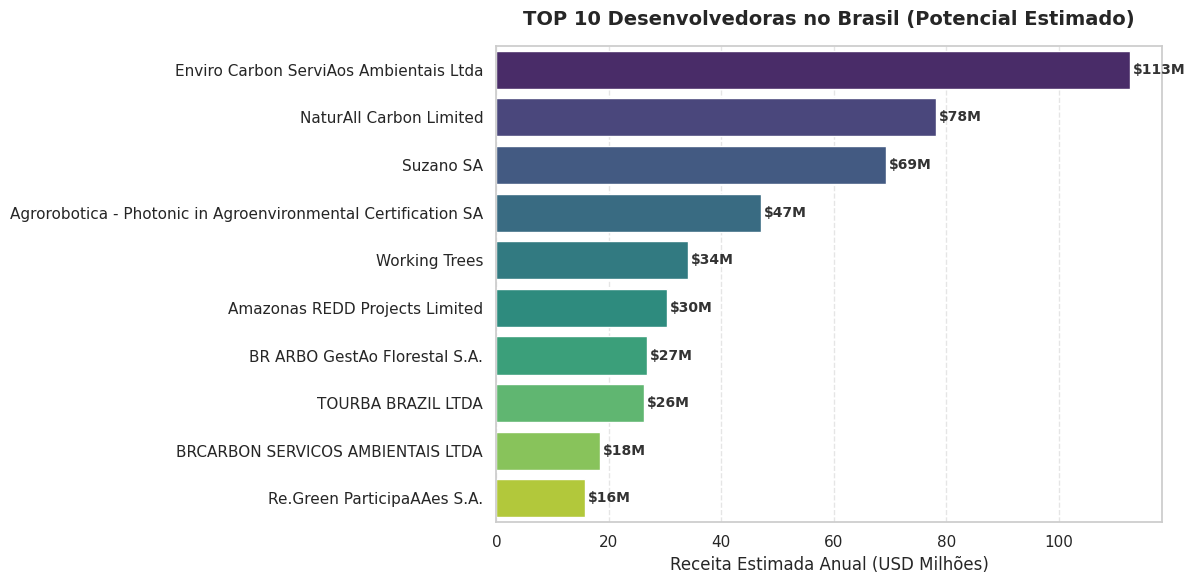

----------------------------------------
LÍDER DO MERCADO: Enviro Carbon ServiAos Ambientais Ltda
----------------------------------------


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import unicodedata
import warnings

# Silencia avisos de fonte para limpar o output
warnings.filterwarnings("ignore")

# 1. Configuração Visual
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# 2. Carregamento (Project Database)
FILE_PATH = './data/raw_data_pipeline.csv'
COLS_MAP = {
    'Proponent': 'developer_company',
    'Country/Area': 'country',
    'Project Type': 'project_type',
    'Estimated Annual Emission Reductions': 'quantity'
}

try:
    print(">>> Processando Proponentes...")
    df = pd.read_csv(FILE_PATH, usecols=COLS_MAP.keys(), encoding='latin1', low_memory=False)
    df = df.rename(columns=COLS_MAP)

    # Limpeza Numérica
    if df['quantity'].dtype == 'O':
        df['quantity'] = df['quantity'].astype(str).str.replace(',', '').astype(float)

    # 3. Engenharia de Preço (Estimativa)
    def pricing_engine(row):
        p_type = str(row['project_type']).lower()
        if 'forestry' in p_type or 'land use' in p_type or 'agriculture' in p_type:
            return 10.00
        return 1.50

    df['estimated_price'] = df.apply(pricing_engine, axis=1)
    df['estimated_revenue'] = df['quantity'] * df['estimated_price']

    # 4. Filtro Brasil
    df_br = df[df['country'].str.contains('Brazil', case=False, na=False)].copy()

    # --- LIMPEZA DE TEXTO BLINDADA (Fim dos erros de Glyph) ---
    def limpar_texto_blindado(texto):
        if pd.isna(texto): return "Não Identificado"
        texto = str(texto)
        
        # Normalização Unicode (transforma caracteres estranhos em padrão)
        texto = unicodedata.normalize('NFKD', texto).encode('ascii', 'ignore').decode('utf-8')
        
        # Limpeza extra
        texto = texto.strip()
        
        # Correções Manuais de Nomes Comuns
        if 'Biofilica' in texto: return 'Biofilica Ambipar'
        if 'Carbonext' in texto: return 'Carbonext'
        if 'Jari' in texto: return 'Jari Celulose'
        if 'Agropalma' in texto: return 'Agropalma'
        if 'Sustainable Carbon' in texto: return 'Sustainable Carbon'
        
        return texto

    df_br['developer_company'] = df_br['developer_company'].apply(limpar_texto_blindado)

    # 5. Ranking (Top 10)
    ignore_list = ['Nao Identificado', 'Multiple Proponents']
    ranking = df_br[~df_br['developer_company'].isin(ignore_list)] \
                .groupby('developer_company')['estimated_revenue'] \
                .sum() \
                .sort_values(ascending=False) \
                .head(10)

    # 6. Plotagem
    plt.figure(figsize=(12, 6))
    
    # Gráfico de Barras Horizontais
    ax = sns.barplot(
        x=ranking.values / 1e6, 
        y=ranking.index, 
        palette='viridis' # Paleta profissional
    )

    plt.title('TOP 10 Desenvolvedoras no Brasil (Potencial Estimado)', fontsize=14, fontweight='bold', pad=15)
    plt.xlabel('Receita Estimada Anual (USD Milhões)', fontsize=12)
    plt.ylabel('')
    
    # Adicionar valores nas barras
    for i, v in enumerate(ranking.values):
        ax.text(v/1e6 + 0.5, i, f"${v/1e6:,.0f}M", va='center', fontweight='bold', fontsize=10, color='#333333')

    plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

    # Insight
    top_dev = ranking.index[0]
    print("-" * 40)
    print(f"LÍDER DO MERCADO: {top_dev}")
    print("-" * 40)

except Exception as e:
    print(f"Erro: {e}")